# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Mounted at /content/drive


# 📁 **LECTURA DEL DATASET**

In [2]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [31]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**

In [32]:

def analisis_valores_faltantes(df):
    analisis = {}
    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary =  df.isnull().sum() # ← COMPLETAR

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = (df.isnull().mean() * 100).round(2) # ← COMPLETAR

    # TODO 1.3: Crear un dataframe solo con las columas y filas que tienen valores faltantes
    missing_info = pd.DataFrame({
        'Valores_Faltantes': missing_summary,
        'Porcentaje_Faltantes(%)': missing_percent})  # ← COMPLETAR
    missing_info = missing_info[missing_info['Valores_Faltantes'] > 0].sort_values(by='Porcentaje_Faltantes(%)', ascending=False) # ← COMPLETAR - FILTRAR solo columnas con valores faltantes
    return missing_info

In [33]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,Valores_Faltantes,Porcentaje_Faltantes(%)
estadoTran,4331,95.08
estado,2622,57.56
Terreno,1728,37.94
Area Construcción,1259,27.64
tipoTran,3,0.07
Total M²,1,0.02


In [40]:
columnas_con_faltantes = dfValoresFaltantes.index.tolist()
df_filtrado = df[columnas_con_faltantes]

In [41]:
def grafico_distribucion_faltantes(df):
    # TODO : Graficar un mapa de calor de los Valores Faltantes
    # ← COMPLETAR
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(),
                cmap='viridis',
                cbar=False,
                yticklabels=False)
    plt.title('Distribución de Valores Faltantes')
    plt.xlabel('Columnas')
    plt.ylabel('Filas')
    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


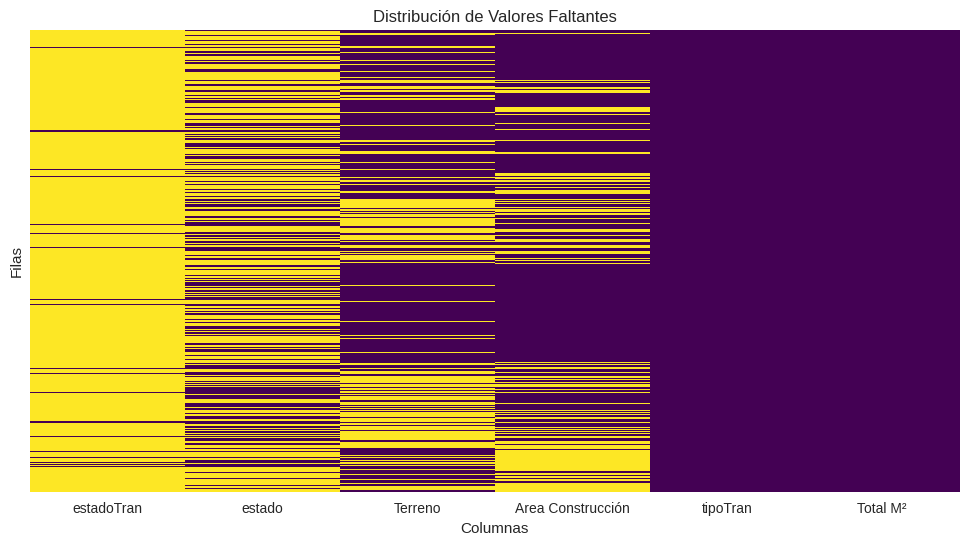

In [42]:

#Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(df_filtrado)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

**¿Qué columnas tienen el mayor porcentaje de valores faltantes?**

Las columnas con mayor porcentaje de faltantes son: estadoTran, estado, terreno y Area Contrucción.

**¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.**

Si, el patrón es vertical, donde las columnas estadoTran y estado, existen múltiples valores faltantes, casi coincidentes, lo que puede develar una correlación. Casi lo mismo entre terreno y Area Construcción, pero de manera menos uniforme

**¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones.**

Según lo observado, si se observa correlación entre las variables. Cuando falta un dato en estadoTran, casi siempre falta un dato en estado. Terreno y Area Contrucción también presentan correlación pero en más baja medida. tipoTran y Total M2 no presentan correclación.


# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [43]:
from pandas.core.arrays import numeric
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numericas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    # TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    correlation_matrix = df.corr(numeric_only=True).round(2)  # ← COMPLETAR
    print(correlation_matrix)

    # TODO 2.2: Visualizar matriz de correlación
    plt.figure(figsize=(10, 8))
    # ← COMPLETAR
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
                linewidths=0.5)
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.show()



🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar  Agua  Alarma  Alcantarillado  Amoblado  \
Aeropuerto            1.00       0.04  0.23    0.09            0.17      0.07   
Aestrenar             0.04       1.00  0.06    0.14            0.06     -0.01   
Agua                  0.23       0.06  1.00    0.10            0.75      0.11   
Alarma                0.09       0.14  0.10    1.00            0.08      0.19   
Alcantarillado        0.17       0.06  0.75    0.08            1.00      0.09   
...                    ...        ...   ...     ...             ...       ...   
NoBan                 0.03      -0.05  0.12    0.12            0.10      0.14   
NoDorm                0.02      -0.05  0.12    0.09            0.10      0.09   
lat                  -0.02      -0.01 -0.03    0.02           -0.02     -0.00   
lng                  -0.08      -0.05 -0.11   -0.04           -0.07     -0.03   
precio                0.00      -0.01  0.01    0

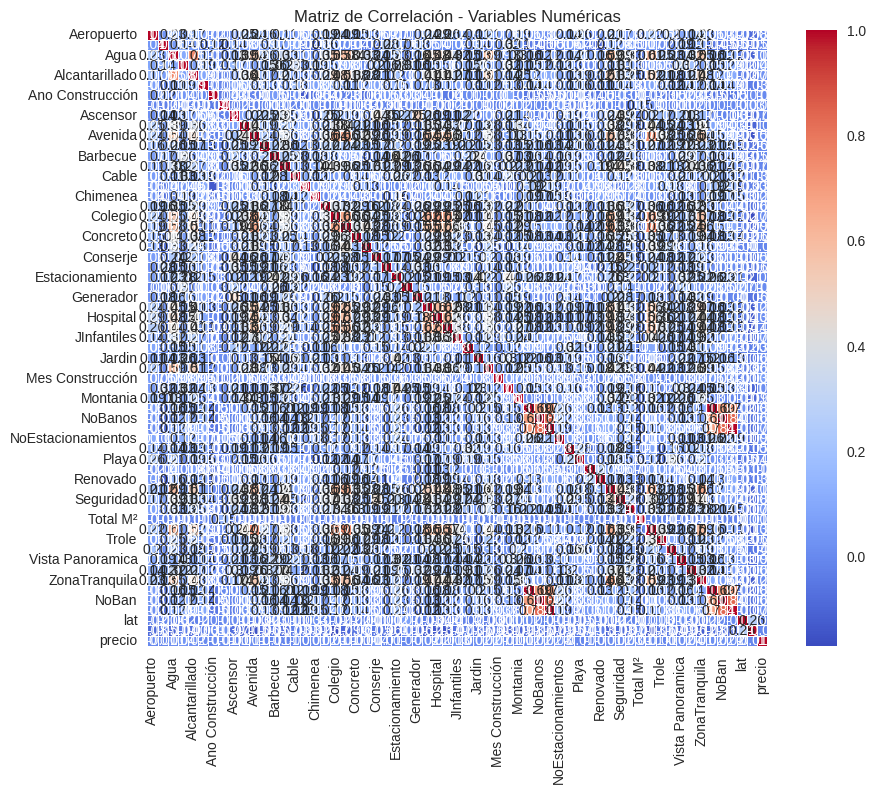

In [44]:
 # ← COMPLETAR Ejecutar análisis multivariable
analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**
**Clasifique los tipos de valores faltantes de acuero a las relaciones que identifico previamente**

De lo observado, se puede decir que no existen valores faltantes MCAR, es probable que los faltantes sean tipo MAR, y que estadoTran o estado tengan valores faltantes del tipo MNAR.

**Preguntas para el Análisis:
¿Los valores faltantes son MCAR, MAR o MNAR?**

Principalmente los valores faltantes son MAR, esto porque hay una fuerte correlación entre las columnas faltantes. Puede que existan valores faltantes tipo MNAR, como estadoTran y estado.

**¿Qué variables podrían predecir la presencia de valores faltantes?**

tipoTran, estadoTran, Terreno, NoBan, precio

# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [47]:
# Aplique una tecnica adecuada para cada columna de valor faltante.
#Se va a imptar de la siguiente manera:
#estadoTran: rellenar con el valor más frecuente
#estado: rellenar con el valor más frecuent
#Terreno: imputar con la mediada
#Area Construcción: im´putar con la mediana
#tipoTran: imputar con el valor más frecuente

def imputar_valores_faltantes(df):

    print("🔄 INICIANDO IMPUTACIÓN DE VALORES FALTANTES...\n")
    df_imputado = df.copy()

    # ✅ Limpieza y conversión de columnas numéricas (elimina comas y convierte a float)(exiten columnas que son texto, por eso se convierte)
    for col in ['Terreno', 'Area Construcción']:
        if col in df_imputado.columns:
            df_imputado[col] = (
                df_imputado[col]
                .astype(str)
                .str.replace(',', '', regex=False)  # elimina comas
                .replace('nan', np.nan)
                .astype(float)
            )
            print(f"🔢 {col}: convertido a numérico correctamente")

    # ✅ Imputar variables categóricas con la moda
    for col in ['estadoTran', 'estado', 'tipoTran']:
        if col in df_imputado.columns:
            moda = df_imputado[col].mode(dropna=True)[0]
            df_imputado[col] = df_imputado[col].fillna(moda)
            print(f"🧱 {col}: imputado con la moda → '{moda}'")

    # ✅ Imputar variables numéricas con la mediana
    for col in ['Terreno', 'Area Construcción']:
        if col in df_imputado.columns:
            mediana = df_imputado[col].median()
            df_imputado[col] = df_imputado[col].fillna(mediana)
            print(f"📏 {col}: imputado con la mediana → {mediana}")

    # ✅ Verificar faltantes restantes
    faltantes_restantes = df_imputado.isnull().sum().sum()
    print(f"\n✅ Imputación completada. Valores faltantes restantes: {faltantes_restantes}")

    return df_imputado



In [48]:
df_imputado = imputar_valores_faltantes(df)
print("\n🔍 Verificación de valores faltantes post-imputación:")
display(df_imputado.isnull().sum()[df_imputado.isnull().sum() > 0])


🔄 INICIANDO IMPUTACIÓN DE VALORES FALTANTES...

🔢 Terreno: convertido a numérico correctamente
🔢 Area Construcción: convertido a numérico correctamente
🧱 estadoTran: imputado con la moda → 'VENDIDA'
🧱 estado: imputado con la moda → 'Usada'
🧱 tipoTran: imputado con la moda → 'De Venta'
📏 Terreno: imputado con la mediana → 234.0
📏 Area Construcción: imputado con la mediana → 158.685

✅ Imputación completada. Valores faltantes restantes: 1

🔍 Verificación de valores faltantes post-imputación:


,0
Total M²,1


# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [ ]:
# aplique el Chi-cuadrado (χ2) para determinar la relacion entre dos de los atributos categoricos

In [53]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi_cuadrado_entre_categoricos(df, col1, col2):
    print(f"Análisis Chi-cuadrado entre '{col1}' y '{col2}':\n")

    # Crear tabla de contingencia
    tabla_contingencia = pd.crosstab(df[col1], df[col2])
    print("Tabla de contingencia:")
    print(tabla_contingencia)

    # Aplicar prueba Chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

    # Resultados
    print(f"\nEstadístico Chi-cuadrado: {chi2:.4f}")
    print(f"Grados de libertad: {dof}")
    print(f"Valor p: {p:.4e}")

    if p < 0.05:
        print(f"\nLas variables '{col1}' y '{col2}' están asociadas (rechazamos H0).")
    else:
        print(f"\nNo hay evidencia suficiente para afirmar asociación entre '{col1}' y '{col2}' (no rechazamos H0).")

# Se usa el dataframe imputado pára evitar valores faltantes
chi_cuadrado_entre_categoricos(df_imputado, 'estado', 'estadoTran')


Análisis Chi-cuadrado entre 'estado' y 'estadoTran':

Tabla de contingencia:
estadoTran                   En Construcción / En Planos  Oferta  PROBABLE  \
estado                                                                       
En Construcción / En Planos                           78       0         0   
PROBABLE                                               0       0         4   
Por Estrenar                                           3       0         0   
RESERVADA                                              0       0         0   
Reconstruida/ Renovada                                 0       0         0   
Usada                                                  0       6         2   
VENDIDA                                                0       0         0   

estadoTran                   RESERVADA  VENDIDA  
estado                                           
En Construcción / En Planos          0        0  
PROBABLE                             0        0  
Por Estrenar        

# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [56]:
# Aplique una tecnica adecuada para cada columna de valor faltante.
columnas_categoricas = df_imputado.select_dtypes(include=['object']).columns

# Iteramos sobre cada columna categórica
for col in columnas_categoricas:
    # Verificamos si la columna tiene valores faltantes
    if df_imputado[col].isnull().sum() > 0:
        # Calculamos la moda (el valor más frecuente)
        moda = df_imputado[col].mode()[0]

        # Imputamos los valores faltantes con la moda
        df_imputado[col] = df_imputado[col].fillna(moda)

        print(f"La Columna '{col}': Valores faltantes imputados con la moda ('{moda}').")

# --- VERIFICACIÓN FINAL ---
print("\n--- Verificación Post-Imputación Categórica ---")

# Calculamos los valores faltantes restantes en las columnas categóricas
faltantes_restantes = df_imputado[columnas_categoricas].isnull().sum().sum()

if faltantes_restantes == 0:
    print("No quedan valores faltantes en las columnas categóricas.")
else:
    print(f"Aún quedan {faltantes_restantes} valores faltantes en las columnas categóricas.")

# Mostramos un resumen de los nulos en todo el DataFrame para ver el estado general
print("\nResumen de valores faltantes en todo el DataFrame:")
display(df_imputado.isnull().sum())




--- Verificación Post-Imputación Categórica ---
No quedan valores faltantes en las columnas categóricas.

Resumen de valores faltantes en todo el DataFrame:


,0
_id,0
estado,0
direccion,0
Aeropuerto,0
Aestrenar,0
...,...
precio,0
price,0
tipoInv,0
tipoTran,0


# ✅ **RESULTADOS:**
¿Qué columnas presentaron mayores desafíos para la imputación?

Las comlumnas más jodidas fueron estado y estadoTrans, porque se debía mantener la relación de estas variables, como lo demuestra el chi-cuadrado.

¿En qué casos consideraron que la eliminación era mejor que la imputación?

Cuando la columna tiene muchos valores  faltantes y no es crítica para el análisis.

¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?

Para MCAR, la aucencia no depende de ninguna variable ni del valor en sí. Para mAR, la aucencia depende de otras variables observadas.
Para MNAR, la aucencia depdende del mismo valor que falta.

# 🚀 ¡TALLER FINALIZADO!"